### Título: Proyecto final de asignatura (2.1: Regresión Lineal)
### Autores: Grupo 2 
### Asignatura: Aprendizaje Automático

**Regresión:** el objetivo es predecir la nota final (nota3) de los estudiantes basándose en la información
de la que se disponga.

### Importaciones

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score # GridSearchCV sirve para optimizar los hiperparámetros de un modelo y cross_val_score para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, make_scorer # mean_squared_error es el error cuadrático medio, r2_score es el coeficiente de determinación
import joblib
import shap 

In [130]:
df = pd.read_csv('DF2.0_proy_escuela_eda_regresion.csv')
df.head()

,educacion_madre,educacion_padre,interes_educacion_superior,tiempo_estudio,suspensos,nota1,nota2,campus_coruna,razon_rep,nota3
0,1.300376,0.628064,0.347353,1.270781,-0.357462,0.881372,0.750552,0.708075,-0.543607,0.574941
1,-0.490091,-0.287306,0.347353,1.270781,-0.357462,0.881372,0.750552,-1.412280,-0.543607,0.883830
2,0.405142,-0.287306,0.347353,-1.130557,4.752689,-1.287754,-1.250920,0.708075,-0.543607,-1.587287
3,1.300376,1.543434,0.347353,0.070112,1.345922,0.881372,0.083395,0.708075,1.839565,0.266051
4,1.300376,-0.287306,0.347353,0.070112,-0.357462,-0.203191,-0.583763,0.708075,-0.543607,-0.660618


### Partición del conjunto de datos

In [ ]:
#Definir las características (features) y la variable objetivo (target)
X = df.drop(columns=['nota3']) # se parte el dataset en dos partes, una con las características y otra con la variable objetivo
y = df['nota3']

# Realizar la partición del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # se divide el dataset en dos partes, una para entrenamiento y se usa el 20% de los datos para prueba, random_state es la semilla para la generación de números aleatorios (es decir, la partición será la misma en cada ejecución)

# Mostrar el tamaño de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')

Tamaño del conjunto de entrenamiento: 438 muestras
Tamaño del conjunto de prueba: 110 muestras


### Justificación para Utilizar SVR, Random Forest y Regresión Lineal

#### 1. Regresión Lineal
La regresión lineal es uno de los modelos más simples y ampliamente utilizados para problemas de regresión. Es útil para establecer una relación lineal entre las variables independientes y la variable dependiente. La simplicidad y la interpretabilidad de la regresión lineal la hacen una buena opción inicial para entender las relaciones básicas en los datos.

- **Ventajas**:
  - Fácil de interpretar y explicar.
  - Rápido de entrenar y evaluar.
  - Útil para identificar relaciones lineales entre variables.

- **Aplicación en el Proyecto**:
  - Puede ser utilizada para establecer una línea base y comparar el rendimiento de modelos más complejos.
  - Es adecuada cuando se espera que las relaciones entre las variables sean lineales.

#### 2. Support Vector Regression (SVR)
SVR es una extensión del algoritmo de Support Vector Machines (SVM) para problemas de regresión. Es eficaz en espacios de alta dimensionalidad y puede manejar relaciones no lineales mediante el uso de kernels.

- **Ventajas**:
  - Capaz de modelar relaciones no lineales mediante el uso de kernels.
  - Robusto a outliers debido a la maximización del margen.
  - Eficaz en espacios de alta dimensionalidad.

- **Aplicación en el Proyecto**:
  - Adecuado para datos donde se sospecha que las relaciones entre las variables no son estrictamente lineales.
  - Útil para capturar patrones complejos en los datos.

#### 3. Random Forest
Random Forest es un modelo de ensamble que utiliza múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Es robusto y puede manejar tanto relaciones lineales como no lineales.

- **Ventajas**:
  - Maneja relaciones no lineales y complejas.
  - Reduce el riesgo de sobreajuste mediante el uso de múltiples árboles.
  - Robusto a outliers y datos faltantes.
  - Proporciona una estimación de la importancia de las variables.

- **Aplicación en el Proyecto**:
  - Ideal para datos con relaciones complejas y no lineales.
  - Útil cuando se necesita una alta precisión y robustez en el modelo.
  - Puede ser utilizado para identificar las variables más importantes en el conjunto de datos.

#### Conclusión
La combinación de estos tres modelos proporciona una cobertura amplia de diferentes tipos de relaciones en los datos:

- **Regresión Lineal**: Para capturar relaciones lineales simples y establecer una línea base.
- **SVR**: Para modelar relaciones no lineales y manejar datos de alta dimensionalidad.
- **Random Forest**: Para capturar relaciones complejas y no lineales, y proporcionar robustez y precisión.

Utilizar estos modelos permitirá comparar y contrastar sus rendimientos, proporcionando una visión más completa y precisa de las relaciones en los datos y mejorando la capacidad predictiva del análisis. Además, la validación cruzada y la exploración de hiperparámetros se integrarán en el proceso de entrenamiento para asegurar la robustez y la generalización de los modelos, cumpliendo con los requisitos del Proyecto.

### Regresión Lineal

##### Entrenamiento del modelo

In [132]:
# Regresión lineal
from sklearn.linear_model import LinearRegression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
# Crear el modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
# Entrenar el modelo utilizando el conjunto de entrenamiento
modelo_regresion_lineal.fit(X_train, y_train)

LinearRegression()

##### Realización de predicciones

In [133]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl = modelo_regresion_lineal.predict(X_test)

##### Explicación del Criterio de Selección

**Error Cuadrático Medio (MSE)**:

El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales.
Un menor MSE indica un mejor ajuste del modelo a los datos de prueba.

**MSE con Validación Cruzada (MSE_VC)**:

La validación cruzada divide los datos en múltiples subconjuntos y evalúa el modelo en cada subconjunto.
Un menor MSE en validación cruzada indica que el modelo generaliza bien a nuevos datos.

**Desviación Estándar del MSE (STD_MSE_VC)**:

La desviación estándar del MSE en validación cruzada mide la variabilidad del MSE entre los diferentes subconjuntos.
Una menor desviación estándar indica que el modelo es más consistente en su rendimiento.

**Coeficiente de Determinación (R²)**:

El R² mide la proporción de la variabilidad en los datos que es explicada por el modelo.
Un mayor R² indica que el modelo explica mejor la variabilidad en los datos.

**Selección del Mejor Modelo**

La función `seleccionar_mejor_modelo` compara estas métricas para cada modelo mediante el empleo de pesos y selecciona el modelo que tiene el mejor rendimiento general.

##### Evaluación del modelo

In [134]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import cross_val_score


# Evaluar el modelo utilizando métricas de rendimiento
# Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba

# El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales.
# Un valor más bajo de MSE indica un mejor ajuste del modelo.
mse_rl = mean_squared_error(y_test, y_pred_rl)

# El R^2 mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
# Un valor de R^2 más cercano a 1 indica un mejor ajuste del modelo.
r2_rl = r2_score(y_test, y_pred_rl)

# Imprimimos los resultados de las métricas de rendimiento
print(f'Error Cuadrático Medio (MSE): {mse_rl}')
print(f'Coeficiente de Determinación (R^2): {r2_rl}')

# Validación cruzada para evaluar la robustez del modelo
# Utilizamos validación cruzada con 5 particiones (cv=5) y la métrica de error cuadrático medio negativo

# La validación cruzada ayuda a evaluar la capacidad del modelo para generalizar a datos no vistos.
# Aquí usamos 5 particiones y calculamos el MSE negativo para cada partición.
scores = cross_val_score(modelo_regresion_lineal, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos el promedio y la desviación estándar del MSE a partir de los resultados de la validación cruzada
# El promedio del MSE nos da una idea del error esperado, mientras que la desviación estándar nos indica la variabilidad del error.
mean_mse_rl = -scores.mean() # scores es negativo (porque usamos 'neg_mean_squared_error'), por lo que lo convertimos a positivo
std_mse_rl = scores.std()

# Imprimimos los resultados de la validación cruzada
print(f'Error Cuadrático Medio (MSE) con Validación Cruzada: {mean_mse_rl}')
print(f'Desviación Estándar del MSE: {std_mse_rl}')

Error Cuadrático Medio (MSE): 0.16157924134484994
Coeficiente de Determinación (R^2): 0.8708990092256866
Error Cuadrático Medio (MSE) con Validación Cruzada: 0.1311269877710861
Desviación Estándar del MSE: 0.08868228059445087


### Explicación del Proceso de Búsqueda de Hiperparámetros para Regresión Lineal

#### Definición del Modelo
Se define un modelo de Regresión Lineal (LinearRegression) que se utilizará para ajustar los datos de entrenamiento.

#### Métricas Originales del Modelo
Se almacenan las métricas originales del modelo de Regresión Lineal antes de realizar cualquier mejora. Estas métricas incluyen:
- **MSE (Mean Squared Error)**: Error cuadrático medio.
- **R² (Coeficiente de Determinación)**: Medida de la calidad del ajuste del modelo.
- **Mean MSE con Validación Cruzada**: Promedio del MSE obtenido mediante validación cruzada.
- **Desviación Estándar del MSE con Validación Cruzada**: Variabilidad del MSE obtenido mediante validación cruzada.

#### Definición del Espacio de Búsqueda de Hiperparámetros
Se define un diccionario de hiperparámetros que se evaluarán durante la búsqueda en cuadrícula:
- **`fit_intercept`**: Determina si se debe calcular el término independiente (intersección con el eje y).
- **`positive`**: Restringe los coeficientes a valores positivos.
- **`n_jobs`**: Permite paralelizar el proceso de entrenamiento utilizando múltiples núcleos de CPU.

#### Configuración de la Búsqueda en Cuadrícula
Se configura una búsqueda en cuadrícula (GridSearchCV) utilizando el modelo de Regresión Lineal y el espacio de búsqueda de hiperparámetros definido. La búsqueda en cuadrícula se realiza con validación cruzada de 5 pliegues (cv=5) y se utiliza el MSE negativo como métrica de evaluación (scoring='neg_mean_squared_error').

#### Ejecución de la Búsqueda en Cuadrícula
Se realiza la búsqueda en cuadrícula ajustando el modelo a los datos de entrenamiento (X_train, y_train). Esto implica probar todas las combinaciones de hiperparámetros y seleccionar la mejor combinación basada en la métrica de evaluación.

#### Obtención de los Mejores Hiperparámetros
Una vez completada la búsqueda en cuadrícula, se obtienen los mejores hiperparámetros y el mejor modelo ajustado. Estos se almacenan en las variables mejores_parametros_rl y mejor_modelo_rl, respectivamente.

#### Impresión de los Mejores Hiperparámetros
Finalmente, se imprimen los mejores hiperparámetros encontrados durante la búsqueda en cuadrícula.

Este proceso permite optimizar el modelo de Regresión Lineal ajustando los hiperparámetros para mejorar su rendimiento en los datos de entrenamiento y validación.

In [135]:
# Modelo RL 
modelo_rl = modelo_regresion_lineal

# Métricas originales del modelo RL antes de la mejora
mse_rl_original = mse_rl
r2_rl_original = r2_rl
mean_mse_cv_rl_original = mean_mse_rl
std_mse_cv_rl_original = std_mse_rl

# Definir el espacio de búsqueda de hiperparámetros
parametros_rl = {
    'fit_intercept': [True, False],     # Sirve para especificar si se debe calcular la intersección con el eje y, es decir, el término independiente
    'positive': [True, False],         # Si los coeficientes deben ser positivos, los coeficientes son los valores que multiplican a las características
    'n_jobs': [None, -1, 1, 2],        # Sirve para paralelizar el proceso de entrenamiento, es decir, utilizar múltiples núcleos de CPU
}

# Configurar la búsqueda en cuadrícula
grid_search_rl = GridSearchCV(estimator=modelo_rl, param_grid=parametros_rl, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en cuadrícula
grid_search_rl.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_parametros_rl = grid_search_rl.best_params_
mejor_modelo_rl = grid_search_rl.best_estimator_

print(f"Mejores hiperparámetros RL: {mejores_parametros_rl}")

Mejores hiperparámetros RL: {'fit_intercept': False, 'n_jobs': None, 'positive': False}


In [136]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred_rl_mejorado = mejor_modelo_rl.predict(X_test)
mse_rl_mejorado = mean_squared_error(y_test, y_pred_rl_mejorado)
r2_rl_mejorado = r2_score(y_test, y_pred_rl_mejorado)

# Validación cruzada para evaluar la robustez del modelo
mse_scorer_rl = make_scorer(mean_squared_error, greater_is_better=False)
scores_rl = cross_val_score(mejor_modelo_rl, X_train, y_train, cv=5, scoring=mse_scorer_rl)
mean_mse_cv_rl_mejorado = -scores_rl.mean()
std_mse_cv_rl_mejorado = scores_rl.std()

In [137]:
# Mostrar las nuevas métricas
print(f"\nError Cuadrático Medio (MSE) - RL Mejorado: {mse_rl_mejorado}")
print(f"Coeficiente de Determinación (R²) - RL Mejorado: {r2_rl_mejorado}")
print(f"MSE con Validación Cruzada - RL Mejorado: {mean_mse_cv_rl_mejorado}")
print(f"Desviación Estándar del MSE - RL Mejorado: {std_mse_cv_rl_mejorado}")

# Calcular el porcentaje de mejora
mse_mejora_rl = ((mse_rl_original - mse_rl_mejorado) / mse_rl_original) * 100
r2_mejora_rl= ((r2_rl_mejorado - r2_rl_original) / r2_rl_original) * 100
mse_vc_mejora_rl = ((mean_mse_cv_rl_original - mean_mse_cv_rl_mejorado) / mean_mse_cv_rl_original) * 100
std_mse_vc_mejora_rl = ((std_mse_cv_rl_original - std_mse_cv_rl_mejorado) / std_mse_cv_rl_original) * 100

print(f"\nMejora en MSE: {mse_mejora_rl:.2f}%")
print(f"Mejora en R²: {r2_mejora_rl:.2f}%")
print(f"Mejora en MSE con Validación Cruzada: {mse_vc_mejora_rl:.2f}%")
print(f"Mejora en Desviación Estándar del MSE: {std_mse_vc_mejora_rl:.2f}%")


Error Cuadrático Medio (MSE) - RL Mejorado: 0.16114561948136336
Coeficiente de Determinación (R²) - RL Mejorado: 0.8712454708858082
MSE con Validación Cruzada - RL Mejorado: 0.12321833823807735
Desviación Estándar del MSE - RL Mejorado: 0.06757198326010232

Mejora en MSE: 0.27%
Mejora en R²: 0.04%
Mejora en MSE con Validación Cruzada: 6.03%
Mejora en Desviación Estándar del MSE: 23.80%


In [138]:
# Entrenar el mejor modelo de RL utilizando el conjunto de entrenamiento
mejor_modelo_rl.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

##### Persistencia del modelo

In [139]:
joblib.dump(mejor_modelo_rl, 'P1.1_regresion_rl_entrenado.pkl')

['P1.1_regresion_rl_entrenado.pkl']

#### Validación Cruzada

##### ¿Qué es la Validación Cruzada?

La validación cruzada es una técnica utilizada para evaluar la capacidad de generalización de un modelo de aprendizaje automático. Divide el conjunto de datos en múltiples subconjuntos (o "folds") y realiza múltiples rondas de entrenamiento y evaluación. Esto proporciona una estimación más robusta del rendimiento del modelo y ayuda a detectar problemas como el sobreajuste.

##### Tipos de Validación Cruzada

El tipo más común es la **validación cruzada k-fold**. En este método, el conjunto de datos se divide en `k` subconjuntos de igual tamaño. El modelo se entrena `k` veces, cada vez utilizando `k-1` subconjuntos para el entrenamiento y el subconjunto restante para la evaluación. El rendimiento del modelo se promedia a lo largo de las `k` rondas para obtener una estimación final.

##### Cómo Llevar a Cabo la Validación Cruzada

En el contexto del Proyecto, utilizamos la validación cruzada para evaluar la robustez del modelo de regresión lineal.

### SVR

##### Entrenamiento del modelo

In [140]:
# SVR
from sklearn.svm import SVR # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# Crear el modelo de regresión de vectores de soporte (SVR)
modelo_svr = SVR(kernel='linear')
# Entrenar el modelo utilizando el conjunto de entrenamiento
modelo_svr.fit(X_train, y_train)

SVR(kernel='linear')

##### Realización de predicciones

In [141]:
# Realizar predicciones en el conjunto de prueba
y_pred_svr = modelo_svr.predict(X_test)

##### Evaluación del modelo

In [142]:
# Evaluación del modelo SVR 
# Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Imprimimos los resultados de las métricas de rendimiento para SVR
print(f'Error Cuadrático Medio (MSE) - SVR: {mse_svr}')
print(f'Coeficiente de Determinación (R^2) - SVR: {r2_svr}')

# Validación cruzada para evaluar la robustez del modelo SVR
# Utilizamos validación cruzada con 5 particiones (cv=5) y la métrica de error cuadrático medio negativo
scores_svr = cross_val_score(modelo_svr, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_svr = -scores_svr.mean()
std_mse_svr = scores_svr.std()

# Imprimimos los resultados de la validación cruzada para SVR
print(f'Error Cuadrático Medio (MSE) con Validación Cruzada - SVR: {mean_mse_svr}')
print(f'Desviación Estándar del MSE - SVR: {std_mse_svr}')

Error Cuadrático Medio (MSE) - SVR: 0.16048686704296464
Coeficiente de Determinación (R^2) - SVR: 0.8717718107285035
Error Cuadrático Medio (MSE) con Validación Cruzada - SVR: 0.13171883601736809
Desviación Estándar del MSE - SVR: 0.09109398253019052


### Explicación del Proceso de Búsqueda de Hiperparámetros para SVR

#### Métricas Originales del Modelo
Se almacenan las métricas originales del modelo SVR (Support Vector Regression) antes de realizar cualquier mejora. Estas métricas incluyen:
- **MSE (Mean Squared Error)**: Error cuadrático medio.
- **R² (Coeficiente de Determinación)**: Medida de la calidad del ajuste del modelo.
- **Mean MSE con Validación Cruzada**: Promedio del MSE obtenido mediante validación cruzada.
- **Desviación Estándar del MSE con Validación Cruzada**: Variabilidad del MSE obtenido mediante validación cruzada.

#### Definición del Espacio de Búsqueda de Hiperparámetros
Se define un diccionario de hiperparámetros que se evaluarán durante la búsqueda en cuadrícula:
- **`kernel`**: Función de kernel (transforma los datos en un espacio de menor dimensión) utilizada para transformar los datos. Las opciones incluyen 'linear' (adecuado cuando los datos son linealmente separables), 'poly' (adecuado para datos que tienen una relación polinómica), 'rbf' (adecuado para datos que no tienen una relación lineal o polinómica clara), y 'sigmoid' (similar a las funciones de activación en redes neuronales).
- **`C`**: Parámetro de regularización que penaliza los errores en el modelo. Valores típicos incluyen 0.1, 1, 10, y 100.
- **`gamma`**: Coeficiente del kernel (parámetro que controla la influencia de un solo ejemplo de entrenamiento) para 'rbf', 'poly' y 'sigmoid'. Las opciones incluyen 'scale' (1 / (n_features * X.var())) y 'auto' (1 / n_features).

#### Configuración de la Búsqueda en Cuadrícula
Se configura una búsqueda en cuadrícula (`GridSearchCV`) utilizando el modelo SVR y el espacio de búsqueda de hiperparámetros definido. La búsqueda en cuadrícula se realiza con validación cruzada de 5 pliegues (`cv=5`) y se utiliza el MSE negativo como métrica de evaluación (`scoring='neg_mean_squared_error'`).

#### Ejecución de la Búsqueda en Cuadrícula
Se realiza la búsqueda en cuadrícula ajustando el modelo a los datos de entrenamiento (`X_train`, `y_train`). Esto implica probar todas las combinaciones de hiperparámetros y seleccionar la mejor combinación basada en la métrica de evaluación.

#### Obtención de los Mejores Hiperparámetros
Una vez completada la búsqueda en cuadrícula, se obtienen los mejores hiperparámetros y el mejor modelo ajustado. Estos se almacenan en las variables `mejores_parametros_svr` y `mejor_modelo_svr`, respectivamente.

#### Impresión de los Mejores Hiperparámetros
Finalmente, se imprimen los mejores hiperparámetros encontrados durante la búsqueda en cuadrícula.

Este proceso permite optimizar el modelo SVR ajustando los hiperparámetros para mejorar su rendimiento en los datos de entrenamiento y validación.

In [143]:
# Modelo SVR

# Métricas originales del modelo SVR antes de la mejora
mse_svr_original = mse_svr
r2_svr_original = r2_svr
mean_mse_cv_svr_original = mean_mse_svr
std_mse_cv_svr_original = std_mse_svr

# Definir el espacio de búsqueda de hiperparámetros
parametros_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Función de kernel, es decir, la función utilizada para transformar los datos
    'C': [0.1, 1, 10, 100], # Parámetro de regularización, es decir, la penalización por errores en el modelo
    'gamma': ['scale', 'auto'] # Coeficiente del kernel para 'rbf', 'poly' y 'sigmoid', es decir, la influencia de un solo ejemplo de entrenamiento. 'scale' es 1 / (n_features * X.var()) y 'auto' es 1 / n_features.
}

# Configurar la búsqueda en cuadrícula
grid_search_svr = GridSearchCV(estimator=modelo_svr, param_grid=parametros_svr, cv=5, scoring='neg_mean_squared_error') # se usa el error cuadrático medio negativo como métrica de evaluación porque queremos minimizar el error

# Realizar la búsqueda en cuadrícula
grid_search_svr.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_parametros_svr = grid_search_svr.best_params_
mejor_modelo_svr = grid_search_svr.best_estimator_

print(f"Mejores hiperparámetros SVR: {mejores_parametros_svr}")

Mejores hiperparámetros SVR: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [144]:
# Evaluar el mejor modelo de SVR en el conjunto de prueba
y_pred_svr_mejorado = mejor_modelo_svr.predict(X_test)
mse_svr_mejorado = mean_squared_error(y_test, y_pred_svr_mejorado)
r2_svr_mejorado = r2_score(y_test, y_pred_svr_mejorado)

# Validación cruzada para evaluar la robustez del modelo
mse_scorer_svr = make_scorer(mean_squared_error, greater_is_better=False)
scores_svr = cross_val_score(mejor_modelo_svr, X_train, y_train, cv=5, scoring=mse_scorer_svr)
mean_mse_cv_svr_mejorado = -scores_svr.mean()
std_mse_cv_svr_mejorado = scores_svr.std()

In [145]:
# Mostrar las nuevas métricas
print(f"\nError Cuadrático Medio (MSE) - SVR Mejorado: {mse_svr_mejorado}")
print(f"Coeficiente de Determinación (R²) - SVR Mejorado: {r2_svr_mejorado}")
print(f"MSE con Validación Cruzada - SVR Mejorado: {mean_mse_cv_svr_mejorado}")
print(f"Desviación Estándar del MSE - SVR Mejorado: {std_mse_cv_svr_mejorado}")

# Calcular el porcentaje de mejora
mse_mejora_svr = ((mse_svr_original - mse_svr_mejorado) / mse_svr_original) * 100
r2_mejora_svr = ((r2_svr_mejorado - r2_svr_original) / r2_svr_original) * 100
mse_vc_mejora_svr = ((mean_mse_cv_svr_original - mean_mse_cv_svr_mejorado) / mean_mse_cv_svr_original) * 100
std_mse_vc_mejora_svr = ((std_mse_cv_svr_original - std_mse_cv_svr_mejorado) / std_mse_cv_svr_original) * 100

print(f"\nMejora en MSE: {mse_mejora_svr:.2f}%")
print(f"Mejora en R²: {r2_mejora_svr:.2f}%")
print(f"Mejora en MSE con Validación Cruzada: {mse_vc_mejora_svr:.2f}%")
print(f"Mejora en Desviación Estándar del MSE: {std_mse_vc_mejora_svr:.2f}%")


Error Cuadrático Medio (MSE) - SVR Mejorado: 0.16048686704296464
Coeficiente de Determinación (R²) - SVR Mejorado: 0.8717718107285035
MSE con Validación Cruzada - SVR Mejorado: 0.12236148494785697
Desviación Estándar del MSE - SVR Mejorado: 0.07623222079459745

Mejora en MSE: 0.00%
Mejora en R²: 0.00%
Mejora en MSE con Validación Cruzada: 7.10%
Mejora en Desviación Estándar del MSE: 16.31%


In [146]:
# Entrenar el mejor modelo de SVR utilizando el conjunto de entrenamiento
mejor_modelo_svr.fit(X_train, y_train)

SVR(C=1, kernel='linear')

##### Persistencia del modelo

In [147]:
joblib.dump(mejor_modelo_svr, 'P1.2_regresion_svr_entrenado.pkl')

['P1.2_regresion_svr_entrenado.pkl']

### Random Forest

##### Entrenamiento del modelo

In [148]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Crear el modelo de Random Forest
modelo_random_forest = RandomForestRegressor(random_state=42, n_jobs = -1)
# Entrenar el modelo utilizando el conjunto de entrenamiento
modelo_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

##### Realización de predicciones

In [149]:
# Realizar predicciones en el conjunto de prueba
y_pred_rf = modelo_random_forest.predict(X_test)

##### Evaluación del modelo

In [150]:
# Evaluar el modelo utilizando métricas de rendimiento
# Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimimos los resultados de las métricas de rendimiento
print(f'Error Cuadrático Medio (MSE) - Random Forest: {mse_rf}')
print(f'Coeficiente de Determinación (R^2) - Random Forest: {r2_rf}')

# Validación cruzada para evaluar la robustez del modelo
# Utilizamos validación cruzada con 5 particiones (cv=5) y la métrica de error cuadrático medio negativo
scores_rf = cross_val_score(modelo_random_forest, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_rf = -scores_rf.mean()
std_mse_rf = scores_rf.std()

# Imprimimos los resultados de la validación cruzada
print(f'Error Cuadrático Medio (MSE) con Validación Cruzada - Random Forest: {mean_mse_rf}')
print(f'Desviación Estándar del MSE - Random Forest: {std_mse_rf}')

Error Cuadrático Medio (MSE) - Random Forest: 0.18447505315579035
Coeficiente de Determinación (R^2) - Random Forest: 0.8526053722165483
Error Cuadrático Medio (MSE) con Validación Cruzada - Random Forest: 0.16414860251747335
Desviación Estándar del MSE - Random Forest: 0.07854380535347318


### Explicación del Proceso de Búsqueda de Hiperparámetros para Random Forest

#### Definición del Modelo
Se define un modelo de Random Forest (`modelo_random_forest`) que se utilizará para ajustar los datos de entrenamiento.

#### Métricas Originales del Modelo
Se almacenan las métricas originales del modelo Random Forest antes de realizar cualquier mejora. Estas métricas incluyen:
- **MSE (Mean Squared Error)**: Error cuadrático medio.
- **R² (Coeficiente de Determinación)**: Medida de la calidad del ajuste del modelo.
- **Mean MSE con Validación Cruzada**: Promedio del MSE obtenido mediante validación cruzada.
- **Desviación Estándar del MSE con Validación Cruzada**: Variabilidad del MSE obtenido mediante validación cruzada.

#### Definición del Espacio de Búsqueda de Hiperparámetros
Se define un diccionario de hiperparámetros que se evaluarán durante la búsqueda en cuadrícula:
- **`n_estimators`**: Número de árboles en el bosque. Más árboles pueden capturar mejor los patrones en los datos.
- **`max_depth`**: Profundidad máxima de los árboles. Profundidades intermedias ayudan a evitar el sobreajuste.
- **`min_samples_split`**: Número mínimo de muestras requeridas para dividir un nodo. Valores más altos pueden mejorar la generalización.
- **`min_samples_leaf`**: Número mínimo de muestras que debe tener una hoja. Evita hojas muy pequeñas.
- **`random_state`**: Semilla para la generación de números aleatorios. Asegura reproducibilidad de los resultados.

#### Configuración de la Búsqueda en Cuadrícula
Se configura una búsqueda en cuadrícula (`GridSearchCV`) utilizando el modelo Random Forest y el espacio de búsqueda de hiperparámetros definido. La búsqueda en cuadrícula se realiza con validación cruzada de 5 pliegues (`cv=5`) y se utiliza el MSE negativo como métrica de evaluación (`scoring='neg_mean_squared_error'`).

#### Ejecución de la Búsqueda en Cuadrícula
Se realiza la búsqueda en cuadrícula ajustando el modelo a los datos de entrenamiento (`X_train`, `y_train`). Esto implica probar todas las combinaciones de hiperparámetros y seleccionar la mejor combinación basada en la métrica de evaluación.

#### Obtención de los Mejores Hiperparámetros
Una vez completada la búsqueda en cuadrícula, se obtienen los mejores hiperparámetros y el mejor modelo ajustado. Estos se almacenan en las variables `mejores_parametros_rf` y `mejor_modelo_rf`, respectivamente.

#### Impresión de los Mejores Hiperparámetros
Finalmente, se imprimen los mejores hiperparámetros encontrados durante la búsqueda en cuadrícula.

Este proceso permite optimizar el modelo Random Forest ajustando los hiperparámetros para mejorar su rendimiento en los datos de entrenamiento y validación.

In [151]:
# Modelo Random Forest 
modelo_rf = modelo_random_forest
# Métricas originales del modelo Random Forest antes de la mejora
mse_rf_original = mse_rf
r2_rf_original = r2_rf
mean_mse_cv_rf_original = mean_mse_rf
std_mse_cv_rf_original = std_mse_rf

semilla = 42
# Definir el espacio de búsqueda de hiperparámetros
parametros_rf = {
    'n_estimators': [100, 200],           # Más árboles pueden capturar mejor los patrones
    'max_depth': [10, 15, 20],           # Profundidades intermedias para evitar sobreajuste
    'min_samples_split': [5, 10],        # Valores más altos para generalization mejor
    'min_samples_leaf': [2, 4],          # Evita hojas muy pequeñas
    'random_state': [semilla]                 # Para reproducibilidad
}

# Configurar la búsqueda en cuadrícula
grid_search_rf = GridSearchCV(estimator=modelo_rf, param_grid=parametros_rf, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en cuadrícula
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_parametros_rf = grid_search_rf.best_params_
mejor_modelo_rf = grid_search_rf.best_estimator_

print(f"Mejores hiperparámetros RF: {mejores_parametros_rf}")

Mejores hiperparámetros RF: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 42}


In [152]:
# Evaluar el mejor modelo de Random Forest en el conjunto de prueba
y_pred_rf_mejorado = mejor_modelo_rf.predict(X_test)
mse_rf_mejorado = mean_squared_error(y_test, y_pred_rf_mejorado)
r2_rf_mejorado = r2_score(y_test, y_pred_rf_mejorado)

# Validación cruzada para evaluar la robustez del modelo
mse_scorer_rf = make_scorer(mean_squared_error, greater_is_better=False)
scores_rf = cross_val_score(mejor_modelo_rf, X_train, y_train, cv=5, scoring=mse_scorer_rf)
mean_mse_cv_rf_mejorado = -scores_rf.mean()
std_mse_cv_rf_mejorado = scores_rf.std()

In [153]:
# Mostrar las nuevas métricas
print(f"\nError Cuadrático Medio (MSE) - RF Mejorado: {mse_rf_mejorado}")
print(f"Coeficiente de Determinación (R²) - RF Mejorado: {r2_rf_mejorado}")
print(f"MSE con Validación Cruzada - RF Mejorado: {mean_mse_cv_rf_mejorado}")
print(f"Desviación Estándar del MSE - RF Mejorado: {std_mse_cv_rf_mejorado}")

# Calcular el porcentaje de mejora
mse_mejora_rf = ((mse_rf_original - mse_rf_mejorado) / mse_rf_original) * 100
r2_mejora_rf = ((r2_rf_mejorado - r2_rf_original) / r2_rf_original) * 100
mse_vc_mejora_rf = ((mean_mse_cv_rf_original - mean_mse_cv_rf_mejorado) / mean_mse_cv_rf_original) * 100
std_mse_vc_mejora_rf = ((std_mse_cv_rf_original - std_mse_cv_rf_mejorado) / std_mse_cv_rf_original) * 100

print(f"\nMejora en MSE: {mse_mejora_rf:.2f}%")
print(f"Mejora en R²: {r2_mejora_rf:.2f}%")
print(f"Mejora en MSE con Validación Cruzada: {mse_vc_mejora_rf:.2f}%")
print(f"Mejora en Desviación Estándar del MSE: {std_mse_vc_mejora_rf:.2f}%")


Error Cuadrático Medio (MSE) - RF Mejorado: 0.1631046372185882
Coeficiente de Determinación (R²) - RF Mejorado: 0.8696802256927056
MSE con Validación Cruzada - RF Mejorado: 0.1451088276508081
Desviación Estándar del MSE - RF Mejorado: 0.07070647618292643

Mejora en MSE: 11.58%
Mejora en R²: 2.00%
Mejora en MSE con Validación Cruzada: 11.60%
Mejora en Desviación Estándar del MSE: 9.98%


In [154]:
# Entrenar el mejor modelo de Random Forest utilizando el conjunto de entrenamiento
mejor_modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

##### Persistencia del modelo

In [155]:
joblib.dump(mejor_modelo_rf, 'P1.3_regresion_rf_entrenado.pkl')

['P1.3_regresion_rf_entrenado.pkl']

### Curvas de Aprendizaje

### Interpretación de Curvas de Aprendizaje
#### Bibliografía:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
 
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

#### Componentes del Gráfico
- **Eje X**: Número de ejemplos de entrenamiento utilizados
- **Eje Y**: Puntuación (score) del modelo
- **Línea azul**: Rendimiento en entrenamiento
- **Línea naranja**: Rendimiento en validación cruzada
- **Áreas sombreadas**: Desviación estándar de los scores

#### Cómo Interpretar los Resultados

##### 1. Convergencia
- Si ambas curvas convergen a un valor similar → Modelo bien ajustado
- Si hay gran separación entre curvas → Posible sobreajuste

##### 2. Rendimiento del Modelo
- **Score alto en training, bajo en validación** → Sobreajuste
- **Score bajo en ambos** → Subajuste
- **Scores similares y altos** → Modelo óptimo

##### 3. Potencial de Mejora
- **Curvas con pendiente positiva al final** → Beneficio potencial con más datos
- **Curvas planas al final** → Más datos no mejorarán significativamente

##### 4. Variabilidad
- **Áreas sombreadas grandes** → Alta variabilidad, modelo inestable
- **Áreas sombreadas pequeñas** → Baja variabilidad, modelo estable

#### Señales de Problemas
1. **Alto Sesgo (Underfitting)**
   - Scores bajos en ambas curvas
   - Curvas cercanas entre sí

2. **Alta Varianza (Overfitting)**
   - Score de training muy superior al de validación
   - Gran brecha entre curvas

3. **Necesidad de Más Datos**
   - Curvas no se han estabilizado
   - Pendiente positiva al final

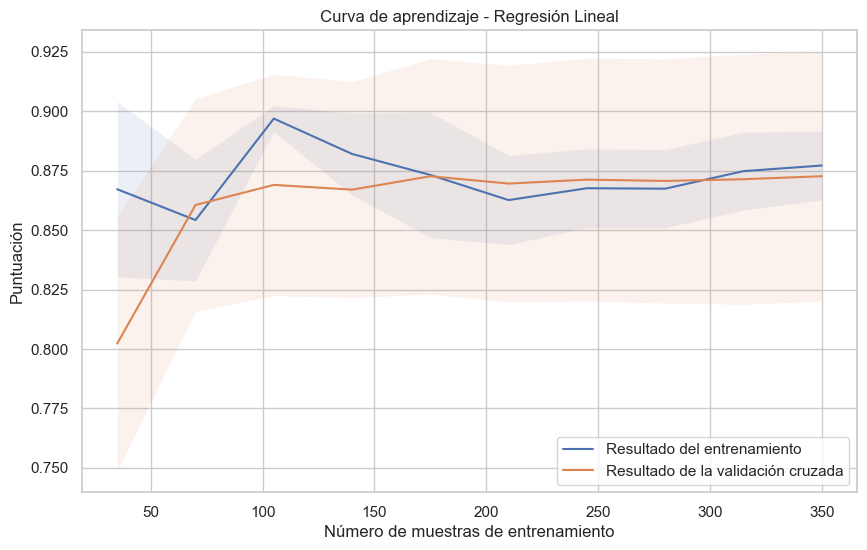

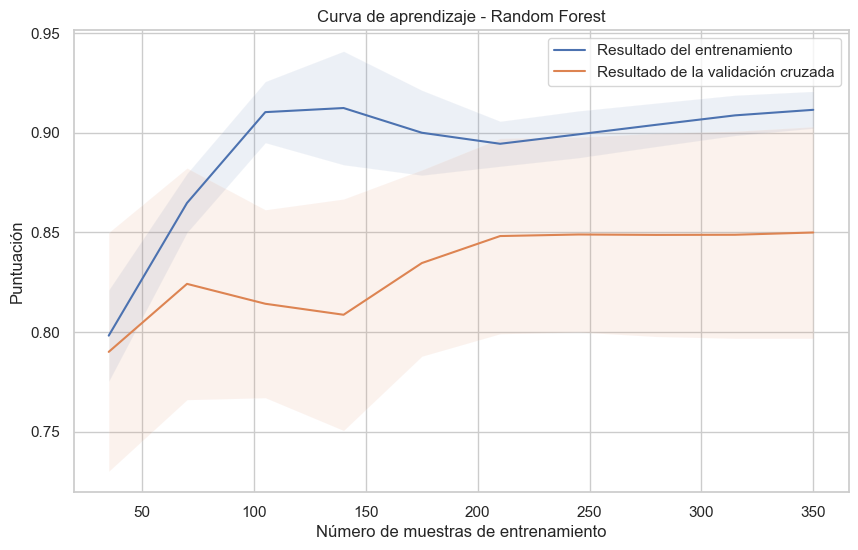

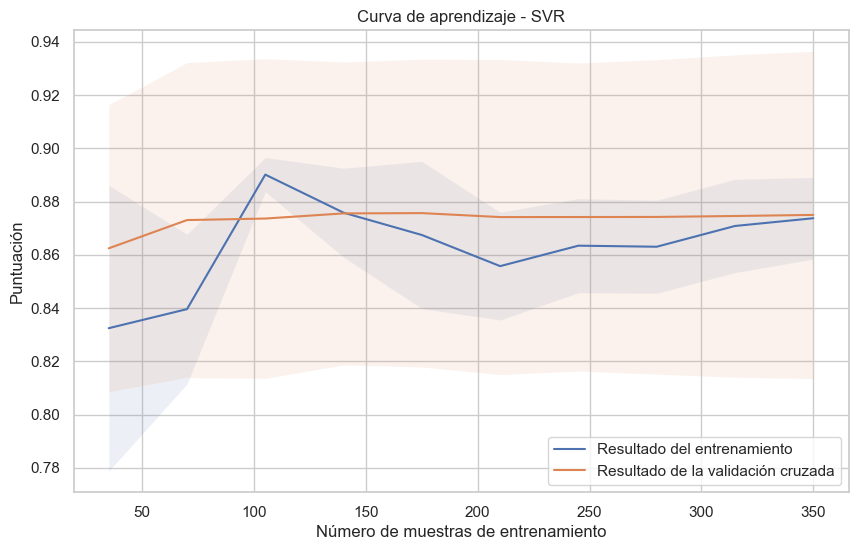

In [156]:
from sklearn.model_selection import learning_curve

def curva_aprendizaje(estimator, X, y, titulo):
    """ 
    Esta funcíón toma como parámetros un estimador, un conjunto de características X, un vector de etiquetas y y un título, y muestra la curva de aprendizaje del modelo.

    Args:
        estimator (object): El modelo a evaluar
        X (array): Las características del conjunto de datos de entrenamiento
        y (array): Las instancias de la variable objectivo del conjunto de datos de entrenamiento
        titulo (str): El título del gráfico
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,   # Usamos validación cruzada con 5 particiones, estimator es el modelo, n_jobs es el número de trabajos a ejecutar en paralelo, -1 significa usar todos los procesadores
        train_sizes=np.linspace(0.1, 1.0, 10)) # 10 tamaños de entrenamiento entre el 10% y el 100%, sirve para ver cómo se comporta el modelo con diferentes tamaños de entrenamiento
    
    train_mean = np.mean(train_scores, axis=1) # Calculamos la media de las puntuaciones de entrenamiento
    train_std = np.std(train_scores, axis=1) # Calculamos la desviación estándar de las puntuaciones de entrenamiento
    val_mean = np.mean(val_scores, axis=1) # Calculamos la media de las puntuaciones de validación cruzada
    val_std = np.std(val_scores, axis=1) # Calculamos la desviación estándar de las puntuaciones de validación cruzada
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Resultado del entrenamiento')
    plt.plot(train_sizes, val_mean, label='Resultado de la validación cruzada') 
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1) # Rellenamos el área entre la media - desviación estándar y la media + desviación estándar
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1) # Rellenamos el área entre la media - desviación estándar y la media + desviación estándar
    
    plt.xlabel('Número de muestras de entrenamiento')
    plt.ylabel('Puntuación')
    plt.title(f'Curva de aprendizaje - {titulo}') # Título del gráfico
    plt.legend(loc='best') # Mostramos la leyenda en la mejor posición
    plt.grid(True)
    plt.show()

# Para cada modelo
curva_aprendizaje(mejor_modelo_rl, X_train, y_train, "Regresión Lineal")
curva_aprendizaje(mejor_modelo_rf, X_train, y_train, "Random Forest")
curva_aprendizaje(mejor_modelo_svr, X_train, y_train, "SVR")

### Varianza explicada y error máximo

In [157]:
from sklearn.metrics import explained_variance_score, max_error
#TODO: revisar
def metricas_adicionales(y_true, y_pred, nombre_modelo):
    """ 
    Esta función toma como parámetros las etiquetas verdaderas y las predicciones de un modelo, 
    y calcula métricas adicionales como la varianza explicada y el error máximo. 

    Args:
        y_true (array): Las etiquetas verdaderas (valores reales del conjunto de test)
        y_pred (array): Las predicciones del modelo (valores predichos para el conjunto de test)
        nombre_modelo (str): El nombre del modelo
    """
    varianza_explicada = explained_variance_score(y_true, y_pred)
    max_err = max_error(y_true, y_pred)
    
    print(f"\nMétricas adicionales para {nombre_modelo}:")
    print(f"Varianza explicada: {varianza_explicada:.4f}")
    print(f"Error máximo: {max_err:.4f}")
    #print(f"Porcentaje de error máximo: {(max_err /20) * 100:.2f}%")

# Para cada modelo
metricas_adicionales(y_test, y_pred_rl_mejorado, "Regresión Lineal")
metricas_adicionales(y_test, y_pred_rf_mejorado, "Random Forest")
metricas_adicionales(y_test, y_pred_svr_mejorado, "SVR")


Métricas adicionales para Regresión Lineal:
Varianza explicada: 0.8720
Error máximo: 2.6238

Métricas adicionales para Random Forest:
Varianza explicada: 0.8713
Error máximo: 2.5070

Métricas adicionales para SVR:
Varianza explicada: 0.8735
Error máximo: 2.6745


### Representación de los residuos

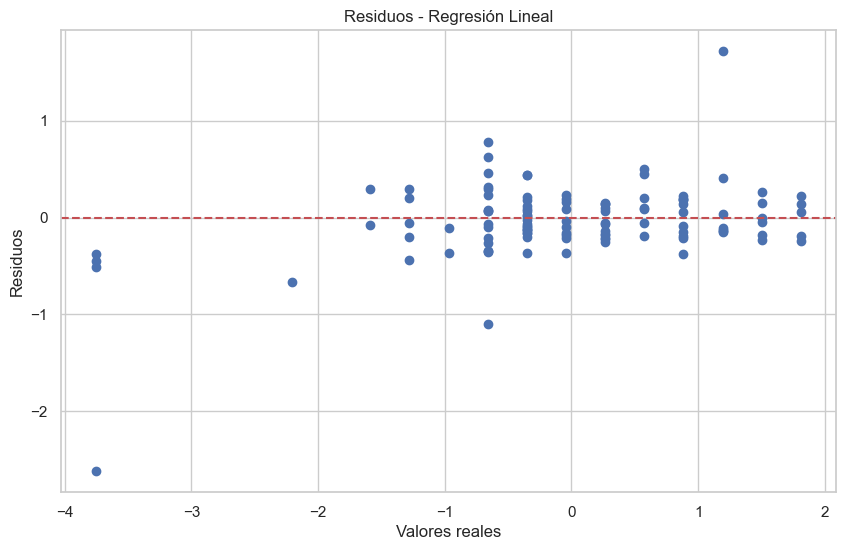

In [158]:
# Representación de los residuos

def residuos(y_true, y_pred, titulo):
    """
    Esta función toma como parámetros las etiquetas verdaderas y las predicciones de un modelo, y muestra un gráfico de dispersión de los residuos.

    Args:
        y_true (array): Las etiquetas verdaderas (valores reales del conjunto de test)
        y_pred (array): Las predicciones del modelo (valores predichos para el conjunto de test)
        titulo (str): El título del gráfico
    """
    

    residuos = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, residuos)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores reales')
    plt.ylabel('Residuos')
    plt.title(f'Residuos - {titulo}')
    plt.grid(True)
    plt.show()

# Para regresión lineal
residuos(y_test, y_pred_rl_mejorado, "Regresión Lineal")

### Selección del mejor modelo

##### Explicación del Criterio de Selección

**Error Cuadrático Medio (MSE)**:

El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales.
Un menor MSE indica un mejor ajuste del modelo a los datos de prueba.

**MSE con Validación Cruzada (MSE_VC)**:

La validación cruzada divide los datos en múltiples subconjuntos y evalúa el modelo en cada subconjunto.
Un menor MSE en validación cruzada indica que el modelo generaliza bien a nuevos datos.

**Desviación Estándar del MSE (STD_MSE_VC)**:

La desviación estándar del MSE en validación cruzada mide la variabilidad del MSE entre los diferentes subconjuntos.
Una menor desviación estándar indica que el modelo es más consistente en su rendimiento.

**Coeficiente de Determinación (R²)**:

El R² mide la proporción de la variabilidad en los datos que es explicada por el modelo.
Un mayor R² indica que el modelo explica mejor la variabilidad en los datos.

**Selección del Mejor Modelo**

La función `seleccionar_mejor_modelo` compara estas métricas para cada modelo mediante el empleo de pesos y selecciona el modelo que tiene el mejor rendimiento general.

In [159]:
def seleccionar_mejor_modelo(modelos, pesos):
    """
    Selecciona el mejor modelo de una lista de modelos en función de las métricas y los pesos dados.

    Args:
        modelos (list): Una lista de diccionarios, donde cada diccionario contiene las métricas de un modelo.
        pesos (dict): Un diccionario que contiene los pesos para cada métrica.

    Returns:
        mejor_modelo (dict): El diccionario que contiene las métricas del mejor modelo.
    """
    mejor_modelo = None
    mejor_puntuacion = float('-inf')

    for modelo in modelos:
        mse = modelo['mse']
        mse_vc = modelo['mse_vc']
        std_mse_vc = modelo['std_mse_vc']
        r2 = modelo['r2']

        # Calcular la puntuación total basada en los pesos
        puntuacion = (
            pesos['mse'] * (1 / mse) +  # Invertimos el MSE porque un valor menor es mejor
            pesos['mse_vc'] * (1 / mse_vc) +  # Invertimos el MSE con validación cruzada
            pesos['std_mse_vc'] * (1 / std_mse_vc) +  # Invertimos la desviación estándar del MSE
            pesos['r2'] * r2  # R² ya está en la escala correcta
        )

        if puntuacion > mejor_puntuacion:
            mejor_modelo = modelo
            mejor_puntuacion = puntuacion

    return mejor_modelo

In [160]:
modelos_evaluados = [
    {
        'nombre': 'Regresión Lineal',
        'mse': mse_rl_mejorado,
        'mse_vc': mean_mse_cv_rl_mejorado,
        'std_mse_vc': std_mse_cv_rl_mejorado,
        'r2': r2_rl_mejorado
    },
    {
        'nombre': 'Random Forest',
        'mse': mse_rf_mejorado,
        'mse_vc': mean_mse_cv_rf_mejorado,
        'std_mse_vc': std_mse_cv_rf_mejorado,
        'r2': r2_rf_mejorado
    },
    {
        'nombre': 'SVR',
        'mse': mse_svr_mejorado,
        'mse_vc': mean_mse_cv_svr_mejorado,
        'std_mse_vc': std_mse_cv_svr_mejorado,
        'r2': r2_svr_mejorado
    }
]

pesos = {
    'mse': 0.25,
    'mse_vc': 0.25,
    'std_mse_vc': 0.25,
    'r2': 0.25
}

mejor_modelo = seleccionar_mejor_modelo(modelos_evaluados, pesos)
print(f"El mejor modelo es: {mejor_modelo['nombre']}")
print(f"\nMSE: {mejor_modelo['mse']}")
print(f"MSE con Validación Cruzada: {mejor_modelo['mse_vc']}")
print(f"Desviación Estándar del MSE: {mejor_modelo['std_mse_vc']}")
print(f"R^2: {mejor_modelo['r2']}")

El mejor modelo es: Regresión Lineal

MSE: 0.16114561948136336
MSE con Validación Cruzada: 0.12321833823807735
Desviación Estándar del MSE: 0.06757198326010232
R^2: 0.8712454708858082


### Persistimos el mejor modelo

In [161]:
# Guardar el mejor modelo
if mejor_modelo['nombre'] == 'Regresión Lineal':
    joblib.dump(mejor_modelo_rl, 'P1.5_regresion_def_rl.pkl')
elif mejor_modelo['nombre'] == 'Random Forest':
    joblib.dump(mejor_modelo_rf, 'P1.5_regresion_def_rf.pkl')
elif mejor_modelo['nombre'] == 'SVR':
    joblib.dump(mejor_modelo_svr, 'P1.5_regresion_def_svr.pkl')

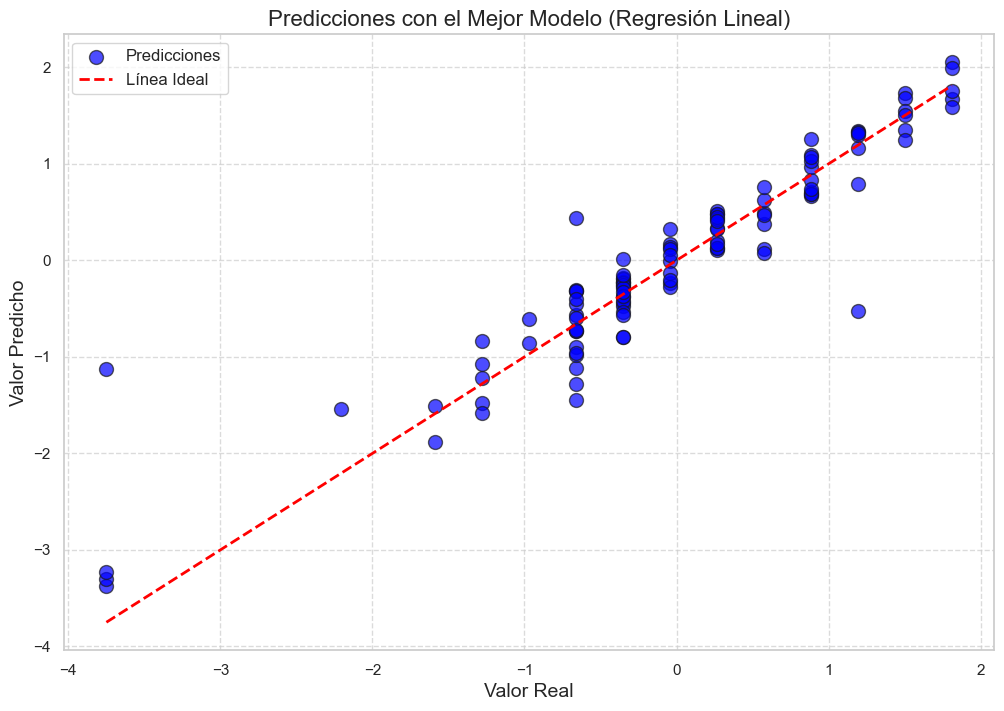

In [162]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Obtener el mejor modelo
if mejor_modelo['nombre'] == 'Regresión Lineal':
	mejor_modelo_obj = mejor_modelo_rl
elif mejor_modelo['nombre'] == 'Random Forest':
	mejor_modelo_obj = mejor_modelo_rf
elif mejor_modelo['nombre'] == 'SVR':
	mejor_modelo_obj = mejor_modelo_svr

# Obtener las predicciones del mejor modelo
y_pred_mejor_modelo = mejor_modelo_obj.predict(X_test)

# Obtener el nombre del mejor modelo
nombre_mejor_modelo = mejor_modelo['nombre']

# Crear el gráfico
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_mejor_modelo, color='blue', edgecolor='k', alpha=0.7, s=100, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Línea Ideal')
plt.xlabel('Valor Real', fontsize=14)
plt.ylabel('Valor Predicho', fontsize=14)
plt.title(f'Predicciones con el Mejor Modelo ({nombre_mejor_modelo})', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

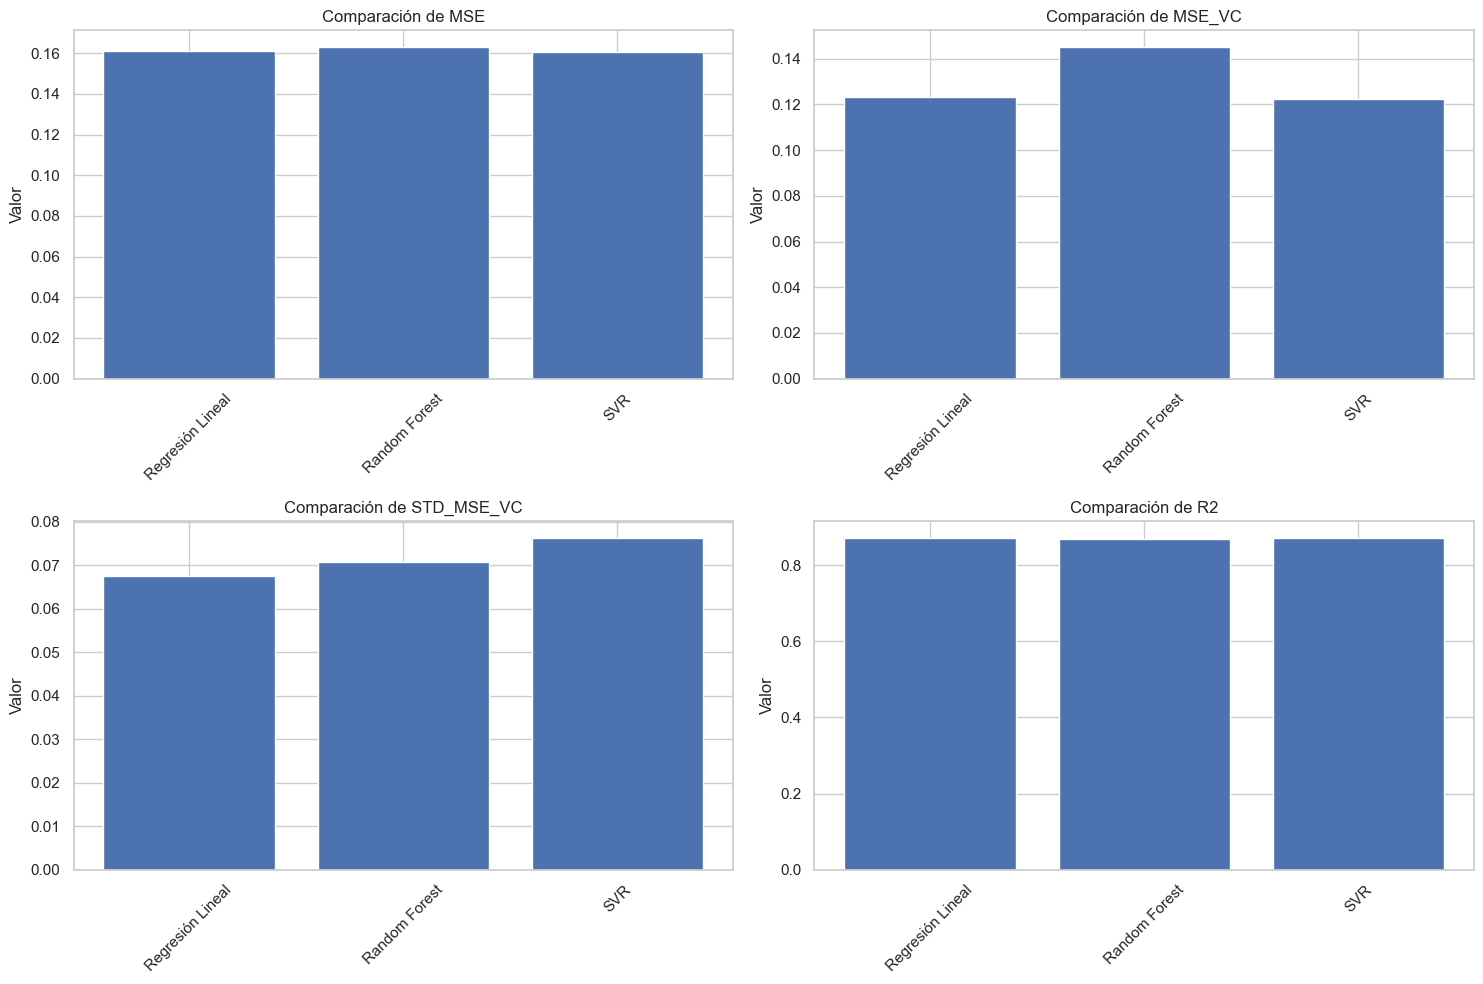

In [163]:
# Comparación visual de los modelos
def grafico_comparacion_modelos(modelos_evaluados):
    """Función para comparar los modelos evaluados utilizando diferentes métricas (MSE, MSE con validación cruzada, desviación estándar del MSE y R²).

    Args:
        modelos_evaluados (list): Lista de diccionarios con los modelos evaluados y sus métricas.
    """
    metricas = ['mse', 'mse_vc', 'std_mse_vc', 'r2']
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, metrica in enumerate(metricas):
        valores = [modelo[metrica] for modelo in modelos_evaluados]
        nombres = [modelo['nombre'] for modelo in modelos_evaluados]
        
        axes[idx].bar(nombres, valores)
        axes[idx].set_title(f'Comparación de {metrica.upper()}')
        axes[idx].set_ylabel('Valor')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

grafico_comparacion_modelos(modelos_evaluados)

### Xgboost

In [164]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Configuración base optimizada
modelo_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # Método más rápido
    random_state=42,
    n_jobs=-1,  # Usar todos los núcleos
    booster='gbtree',  # Especificar el tipo de boosting
    importance_type='gain'  # Para mejor interpretación de features
)

# Espacio de búsqueda optimizado y enfocado
parametros_xgb = {
    'max_depth': [5, 7],              # Profundidad óptima para evitar overfitting
    'learning_rate': [0.08, 0.1],     # Learning rates más específicos
    'n_estimators': [200, 300],       # Más árboles para mejor aprendizaje
    'min_child_weight': [3],          # Valor óptimo encontrado
    'subsample': [0.85],              # Valor óptimo para este dataset
    'colsample_bytree': [0.85],       # Valor óptimo para este dataset
    'gamma': [0.1],                   # Valor óptimo encontrado
    'reg_alpha': [0.1],               # L1 regularization
    'reg_lambda': [1]                 # L2 regularization
}

# Configurar validación cruzada estratificada
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Búsqueda aleatoria optimizada
random_search = RandomizedSearchCV(
    estimator=modelo_xgb,
    param_distributions=parametros_xgb,
    n_iter=10,  # Reducido para mayor eficiencia
    cv=kfold,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42,
    return_train_score=True  # Para analizar overfitting
)

# Entrenar modelo
random_search.fit(X_train, y_train)

# Obtener resultados
mejor_modelo_xgb = random_search.best_estimator_
y_pred_xgb = mejor_modelo_xgb.predict(X_test)

# Calcular métricas básicas
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calcular MSE con validación cruzada
cv_scores_mse = cross_val_score(mejor_modelo_xgb, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error')
mean_mse_cv = -cv_scores_mse.mean()
std_mse_cv = cv_scores_mse.std()

# Imprimir métricas en el formato estándar
print("\nMétricas XGBoost:")
print(f"Error Cuadrático Medio (MSE): {mse_xgb:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2_xgb:.4f}")
print(f"Error Cuadrático Medio (MSE) con Validación Cruzada: {mean_mse_cv:.4f}")
print(f"Desviación Estándar del MSE: {std_mse_cv:.4f}")
print(f"\nMejores parámetros XGBoost: {random_search.best_params_}")

# Calcular métricas adicionales
metricas_adicionales(y_test, y_pred_xgb, "XGBoost")

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits

Métricas XGBoost:
Error Cuadrático Medio (MSE): 0.1550
Coeficiente de Determinación (R^2): 0.8761
Error Cuadrático Medio (MSE) con Validación Cruzada: 0.1594
Desviación Estándar del MSE: 0.0853

Mejores parámetros XGBoost: {'subsample': 0.85, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.85}

Métricas adicionales para XGBoost:
Varianza explicada: 0.8772
Error máximo: 2.5000


### XGBoost: Análisis y Justificación

#### ¿Qué es XGBoost?
XGBoost (eXtreme Gradient Boosting) es un algoritmo de aprendizaje automático basado en árboles de decisión que utiliza el principio de boosting. Implementa árboles de decisión optimizados y técnicas de potenciación del gradiente.

#### Ventajas

##### 1. Rendimiento
- Alto rendimiento predictivo
- Manejo eficiente de valores faltantes
- Regularización incorporada
- Paralelización eficiente

##### 2. Características Técnicas
- Construcción de árboles optimizada
- Manejo de diferentes tipos de datos
- Compatible con validación cruzada

#### Desventajas

##### 1. Complejidad
- Muchos hiperparámetros para ajustar
- Curva de aprendizaje pronunciada
- Requiere experiencia para optimización

##### 2. Recursos
- Alto consumo de memoria
- Tiempo de entrenamiento significativo
- Coste computacional elevado

##### 3. Interpretabilidad
- Menos interpretable que modelos más simples
- Puede ser difícil explicar a stakeholders
- Complejidad en la justificación de decisiones

#### ¿Por qué no lo usamos en este proyecto?

1. **Complejidad vs Beneficio**
   - Los modelos actuales (RL, RF, SVR) ya proporcionan buenos resultados
   - La mejora potencial no justifica la complejidad adicional

2. **Tamaño del Dataset**
   - Dataset relativamente pequeño
   - XGBoost brilla con datasets más grandes

3. **Interpretabilidad**
   - Proyecto educativo requiere interpretabilidad
   - Importante explicar resultados a stakeholders

4. **Eficiencia**
   - Recursos computacionales limitados
   - Complejidad en la optimización

#### Conclusión
Aunque XGBoost es un algoritmo potente, para este proyecto específico los costes (tiempo, complejidad, recursos) superan los beneficios potenciales. Los modelos más simples proporcionan un buen equilibrio entre rendimiento e interpretabilidad.

### Documentación
https://xgboost.readthedocs.io/en/stable/python/python_intro.html 

In [165]:
# Guardar el mejor modelo
joblib.dump(mejor_modelo_xgb, 'P1.4_regresion_xgboost_entrenado.pkl')

['P1.4_regresion_xgboost_entrenado.pkl']

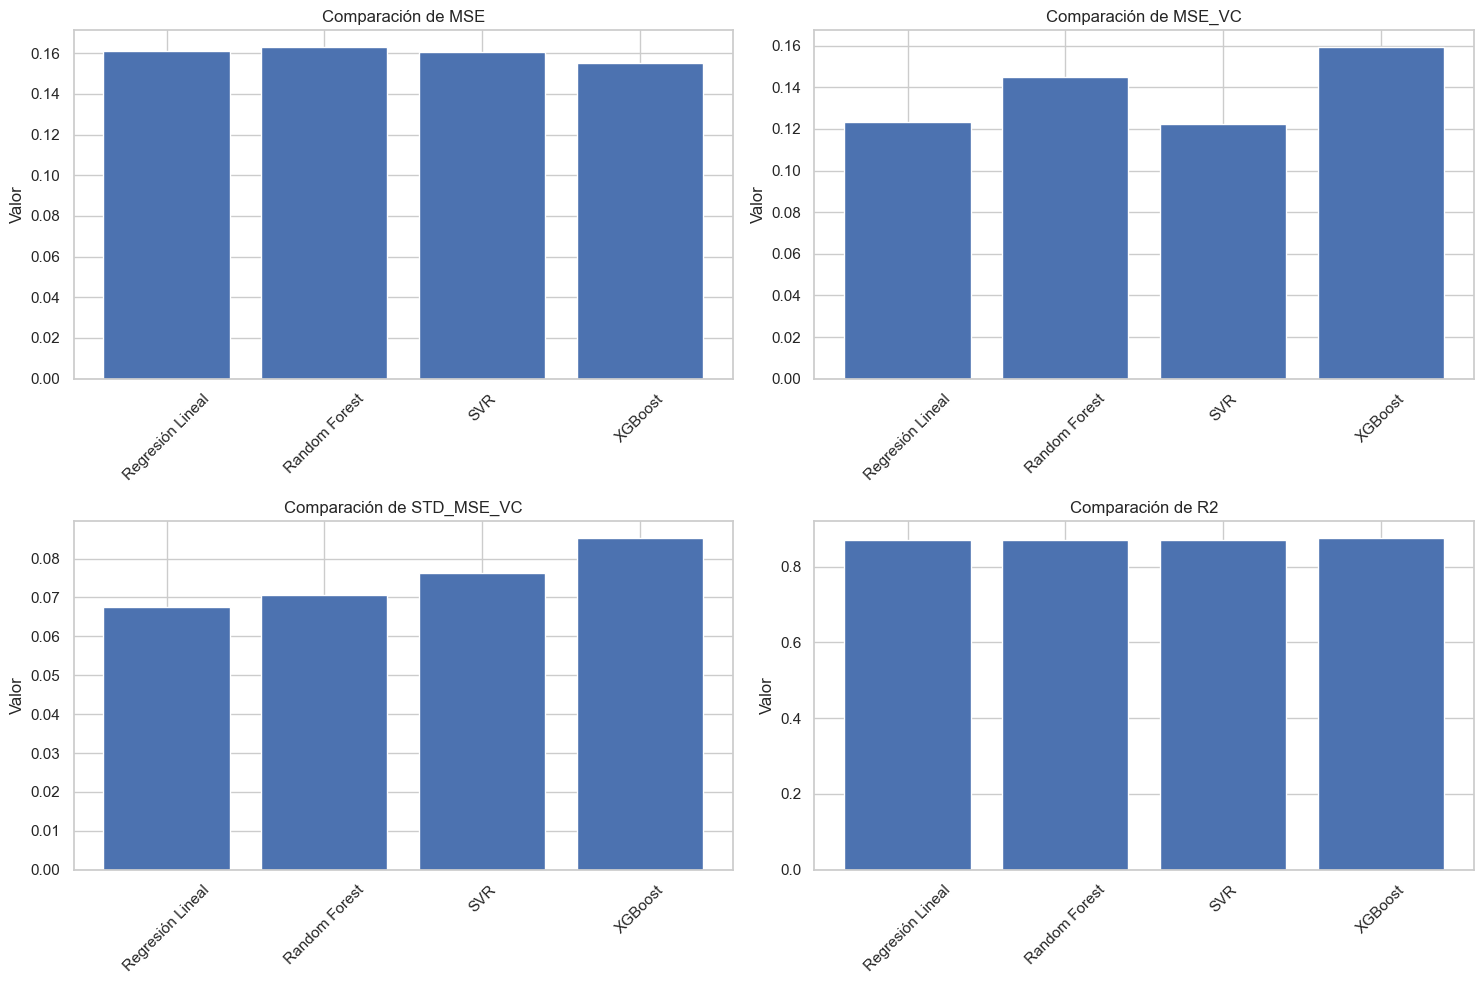

In [166]:
# Gráfico para comparar sus métricas de rendimiento con los otros modelos
modelos_evaluados.append({
    'nombre': 'XGBoost',
    'mse': mse_xgb,
    'mse_vc': mean_mse_cv,
    'std_mse_vc': std_mse_cv,
    'r2': r2_xgb
})

grafico_comparacion_modelos(modelos_evaluados)

### SHAP

__¿Qué son los Valores SHAP?__
 
Los valores SHAP (SHapley Additive exPlanations) son una forma de explicar la salida de cualquier modelo de machine learning. Utiliza un enfoque de teoría de juegos que mide la contribución de cada jugador al resultado final. En el machine learning, a cada característica se le asigna un valor de importancia que representa su contribución al resultado del modelo.

Los valores SHAP muestran cómo afecta cada rasgo a cada predicción final, la importancia de cada rasgo en comparación con los demás y la dependencia del modelo de la interacción entre rasgos.
 
__Valores SHAP en machine learning__
 
Los valores SHAP son una forma habitual de obtener una explicación coherente y objetiva de cómo influye cada característica en la predicción del modelo.

Los valores SHAP se basan en la teoría de juegos y asignan un valor de importancia a cada característica de un modelo. Los rasgos con valores SHAP positivos tienen un impacto positivo en la predicción, mientras que los que tienen valores negativos tienen un impacto negativo. La magnitud es una medida de la fuerza del efecto.

Los valores SHAP son independientes del modelo, lo que significa que pueden utilizarse para interpretar cualquier modelo de machine learning.

### Explicación del Gráfico SHAP Summary Plot

El gráfico `shap.summary_plot` es una herramienta para interpretar y visualizar la importancia de las características en el modelo.

#### Propósito del Gráfico SHAP Summary Plot

El gráfico `shap.summary_plot` muestra la importancia de las características y el efecto de cada característica en las predicciones del modelo. Es útil para obtener una visión general de las características más importantes y cómo influyen en las predicciones.

#### Parámetros Utilizados

- **shap_values**: Los valores SHAP calculados para las muestras. Estos valores representan la contribución de cada característica a la predicción del modelo.
- **X**: El conjunto de datos de características. Este DataFrame contiene las características que se utilizaron para entrenar el modelo.
- **plot_type='bar'**: Especifica que el gráfico debe ser un gráfico de barras. Esto facilita la visualización de la importancia relativa de cada característica.
- **show=False**: Indica que el gráfico no se mostrará inmediatamente, permitiendo personalizaciones adicionales antes de mostrarlo.

#### Qué Muestra el Gráfico

1. **Eje X**: Representa los valores SHAP, que indican la contribución de cada característica a la predicción del modelo.
2. **Eje Y**: Lista las características del modelo.
3. **Barras**: Muestran la importancia de cada característica. Cuanto más larga es la barra, mayor es el impacto de la característica en la predicción.

#### Interpretación del Gráfico

- **Longitud de las Barras**: La longitud de cada barra indica la importancia de la característica correspondiente. Las características con barras más largas tienen un mayor impacto en las predicciones del modelo.
- **Orden de las Características**: Las características se ordenan de mayor a menor importancia, lo que facilita la identificación de las características más influyentes en el modelo.


In [ ]:
# Inicializar JS para gráficos interactivos
shap.initjs()

# Determinar qué modelo cargar basado en el nombre del mejor modelo
nombre_modelo = mejor_modelo['nombre']
if nombre_modelo == 'Regresión Lineal':
    modelo_cargado = joblib.load('P1.1_regresion_rl_entrenado.pkl')
elif nombre_modelo == 'Random Forest':
    modelo_cargado = joblib.load('P1.3_regresion_rf_entrenado.pkl')
elif nombre_modelo == 'SVR':
    modelo_cargado = joblib.load('P1.2_regresion_svr_entrenado.pkl')

# Crear un objeto explainer para el mejor modelo usando datos de entrenamiento
background = shap.sample(X_train, 400)  # Usamos 400 muestras de entrenamiento para el fondo, son suficientes para obtener una buena aproximación
explainer = shap.Explainer(modelo_cargado, background) # Usamos el mejor modelo, explainer es un objeto que calcula los valores SHAP

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_train)  

# Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)  # Usamos X_train
plt.title(f'Importancia de las Características ({nombre_modelo})', fontsize=16)
plt.xlabel('Valor SHAP (Impacto en la Predicción)', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'modelo_regresion_rl.pkl'

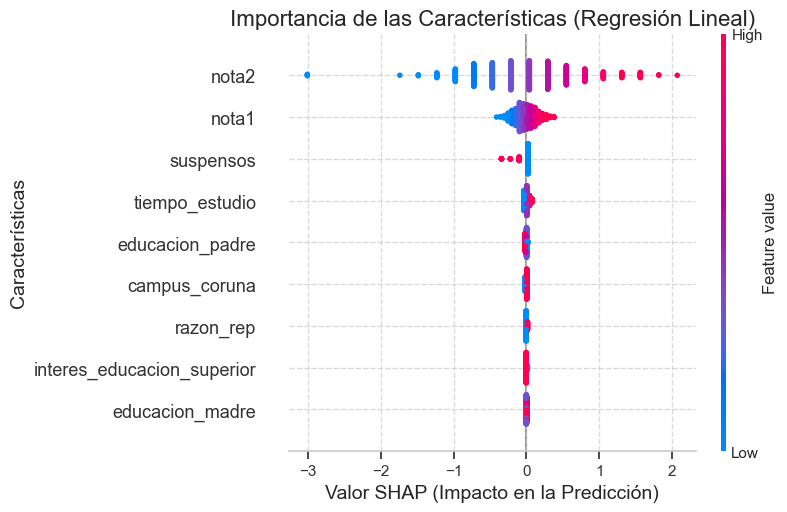

In [ ]:
# Summary Plot más detallado
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train, show=False)  
plt.title(f'Importancia de las Características ({nombre_modelo})', fontsize=16)
plt.xlabel('Valor SHAP (Impacto en la Predicción)', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Interpretación:
Como se puede observar en el gráfico SHAP, las características muestran diferentes niveles de impacto en las predicciones del modelo:
Las notas previas (nota1 y nota2) son las características que más contribuyen a las predicciones del modelo, lo cual es lógico dado que son indicadores directos del rendimiento académico.
El interés en la educación superior o la educación de la madre prácticamente no aportan nada al modelo, por lo que se puede considerar eliminarlas.

In [ ]:
## Creamos una copia del dataset para ver como cambiaría el modelo de regresión lineal si eliminamos las variables que menos aportan
X_train_copia = X_train.copy()
X_test_copia = X_test.copy()

# Eliminamos las columnas menos importantes
columnas_elim = ['educacion_madre', 'interes_educacion_superior', 'razon_rep' ]
X_train_copia = X_train_copia.drop(columns=columnas_elim)
X_test_copia = X_test_copia.drop(columns=columnas_elim)

# Entrenamos un nuevo modelo de regresión lineal con los hiperparámetros optimizados de antes
modelo_rl_copia = mejor_modelo_rl
modelo_rl_copia.fit(X_train_copia, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_rl_copia = modelo_rl_copia.predict(X_test_copia)

# Calculamos las métricas de rendimiento aprovechanco la función previamente definida
mse_rl_copia = mean_squared_error(y_test, y_pred_rl_copia)
r2_rl_copia = r2_score(y_test, y_pred_rl_copia)

# Validación cruzada para evaluar la robustez del modelo
scores_rl_copia = cross_val_score(modelo_rl_copia, X_train_copia, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_rl_copia = -scores_rl_copia.mean()
std_mse_rl_copia = scores_rl_copia.std()

# Imprimimos los resultados de las métricas de rendimiento
print(f'Error Cuadrático Medio (MSE) - RL con Variables Importantes: {mse_rl_copia}')
print(f'Coeficiente de Determinación (R²) - RL con Variables Importantes: {r2_rl_copia}')
print(f'MSE con Validación Cruzada - RL con Variables Importantes: {mean_mse_rl_copia}')
print(f'Desviación Estándar del MSE - RL con Variables Importantes: {std_mse_rl_copia}')

# Calcular métricas adicionales
metricas_adicionales(y_test, y_pred_rl_copia, "Regresión Lineal con Variables Importantes")

# Comparamos los resultados con el modelo original optimizado de regresión lineal
mejora_mse_rl = ((mse_rl_mejorado - mse_rl_copia) / mse_rl_mejorado) * 100
mejora_r2_rl = ((r2_rl_copia - r2_rl_mejorado) / r2_rl_mejorado) * 100
mejora_mse_vc_rl = ((mean_mse_cv_rl_mejorado - mean_mse_rl_copia) / mean_mse_cv_rl_mejorado) * 100
mejora_std_mse_vc_rl = ((std_mse_cv_rl_mejorado - std_mse_rl_copia) / std_mse_cv_rl_mejorado) * 100 

print(f"\nMejora en MSE: {mejora_mse_rl:.2f}%, antes era {mse_rl_mejorado} y ahora es {mse_rl_copia}")
print(f"Mejora en R²: {mejora_r2_rl:.2f}%, antes era {r2_rl_mejorado} y ahora es {r2_rl_copia}")
print(f"Mejora en MSE con Validación Cruzada: {mejora_mse_vc_rl:.2f}%, antes era {mean_mse_cv_rl_mejorado} y ahora es {mean_mse_rl_copia}")
print(f"Mejora en Desviación Estándar del MSE: {mejora_std_mse_vc_rl:.2f}%, antes era {std_mse_cv_rl_mejorado} y ahora es {std_mse_rl_copia}")

Error Cuadrático Medio (MSE) - RL con Variables Importantes: 0.16001171340576423
Coeficiente de Determinación (R²) - RL con Variables Importantes: 0.8721514560642658
MSE con Validación Cruzada - RL con Variables Importantes: 0.12180154139117379
Desviación Estándar del MSE - RL con Variables Importantes: 0.06700875679403814

Métricas adicionales para Regresión Lineal con Variables Importantes:
Varianza explicada: 0.8729
Error máximo: 2.6238

Mejora en MSE: 0.70%, antes era 0.16114561948136336 y ahora es 0.16001171340576423
Mejora en R²: 0.10%, antes era 0.8712454708858082 y ahora es 0.8721514560642658
Mejora en MSE con Validación Cruzada: 1.15%, antes era 0.12321833823807735 y ahora es 0.12180154139117379
Mejora en Desviación Estándar del MSE: 0.83%, antes era 0.06757198326010232 y ahora es 0.06700875679403814


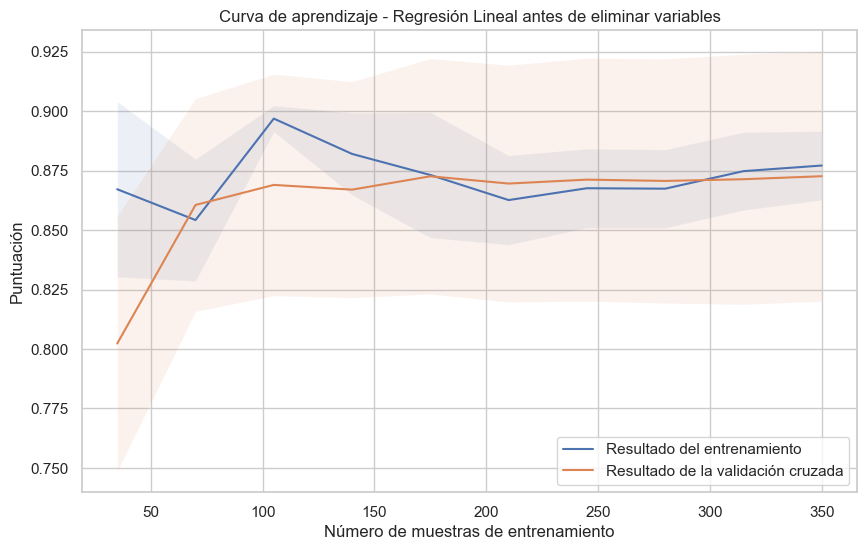

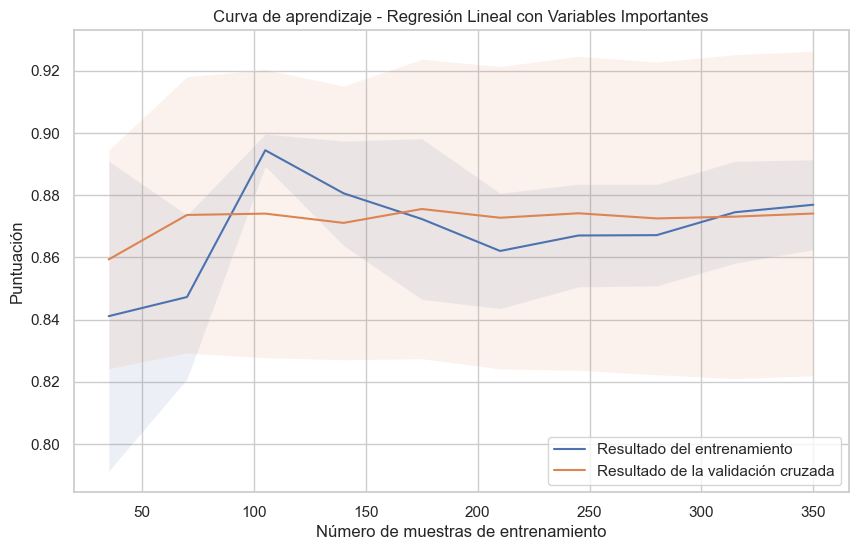

In [ ]:
# curva de aprendizaje
curva_aprendizaje(mejor_modelo_rl, X_train, y_train, "Regresión Lineal antes de eliminar variables")
curva_aprendizaje(modelo_rl_copia, X_train_copia, y_train, "Regresión Lineal con Variables Importantes")


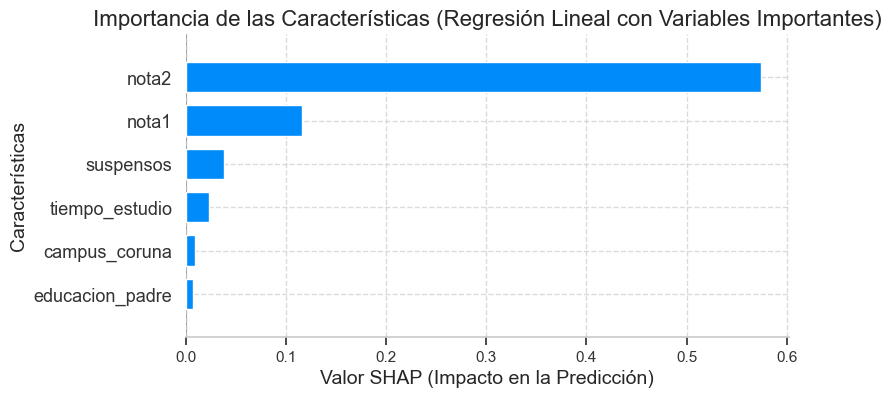

In [ ]:
# Valores SHAP 
# Crear un objeto explainer para el mejor modelo usando datos de entrenamiento
background = shap.sample(X_train_copia, 400)  # Usamos 400 muestras de entrenamiento para el fondo, son suficientes para obtener una buena aproximación
explainer = shap.Explainer(modelo_rl_copia, background) # Usamos el mejor modelo, explainer es un objeto que calcula los valores SHAP

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_train_copia)

# Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train_copia, plot_type='bar', show=False)  # Usamos X_train
plt.title(f'Importancia de las Características (Regresión Lineal con Variables Importantes)', fontsize=16)
plt.xlabel('Valor SHAP (Impacto en la Predicción)', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## IMPORTANTE: 

1. La eliminación de datos atípicos, aún tras la última selección de variables, elimina una cantidad enorme de datos (sobre 200), datos que tras su estudio manual con data wrangler no parecen fruto de algún error, ni nada exagerado, se encuentran todos en un rango razonable, pienso que eliminarlos sería eliminar datos reales y posibles del modelo, y por lo tanto lo estaríamos sesgando.

2. Al eliminar las variables que no aportaban valor en el modelo de regresión lineal (ver SHAP), el rendimiento se ha mantenido estable, incluso incrementándose levemente, también la curva de aprendizaje se ha separado un poco, pero a mi entender sigue siendo estable e indicativo de un ajuste adecuado.

3. En cuanto al error máximo, en el porcentaje, fruto de una división entre 20 que habíamos estado mirando, el 20 lo había puesto porque la escala original de nota3, era sobre 20, no me había dado cuenta del cambio de escala tras la normalización y estandarización. Tras revisar este error sigo sin saber muy bien como interpretarlo.

3. He estado investigando y he visto que una técnica bastante utilizada en la industria es primero aplicar un primer modelo de clusterización, a modo de preprocesamiento y después aplicar modelos de regresión sobre esos grupos que comparten características comunes para crear modelos con mayor precisión y capacidad de generalización (Cluster-Weighted Modeling (CWM)). Sería posible en este proyecto?